# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [1]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

## Importing the Dataset & Exploring it

In [2]:
import plotly.io as pio
pio.renderers.default='colab'

In [3]:
df= pd.read_csv("TSLA.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300
1,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000
2,2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300
3,2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32911900
4,2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
...,...,...,...,...,...,...,...
248,2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600
249,2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300
250,2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600
251,2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26305400


In [5]:
df.info

<bound method DataFrame.info of            Date         Open         High  ...        Close    Adj Close    Volume
0    2020-11-17   460.170013   462.000000  ...   441.609985   441.609985  61188300
1    2020-11-18   448.350006   496.000000  ...   486.640015   486.640015  78044000
2    2020-11-19   492.000000   508.609985  ...   499.269989   499.269989  62475300
3    2020-11-20   497.989990   502.500000  ...   489.609985   489.609985  32911900
4    2020-11-23   503.500000   526.000000  ...   521.849976   521.849976  50260300
..          ...          ...          ...  ...          ...          ...       ...
248  2021-11-11  1102.770020  1104.969971  ...  1063.510010  1063.510010  22396600
249  2021-11-12  1047.500000  1054.500000  ...  1033.420044  1033.420044  25182300
250  2021-11-15  1017.630005  1031.979980  ...  1013.390015  1013.390015  34775600
251  2021-11-16  1003.309998  1057.199951  ...  1054.729980  1054.729980  26305400
252  2021-11-17  1063.510010  1119.640015  ...  1084.11

In [6]:
df.describe

<bound method NDFrame.describe of            Date         Open         High  ...        Close    Adj Close    Volume
0    2020-11-17   460.170013   462.000000  ...   441.609985   441.609985  61188300
1    2020-11-18   448.350006   496.000000  ...   486.640015   486.640015  78044000
2    2020-11-19   492.000000   508.609985  ...   499.269989   499.269989  62475300
3    2020-11-20   497.989990   502.500000  ...   489.609985   489.609985  32911900
4    2020-11-23   503.500000   526.000000  ...   521.849976   521.849976  50260300
..          ...          ...          ...  ...          ...          ...       ...
248  2021-11-11  1102.770020  1104.969971  ...  1063.510010  1063.510010  22396600
249  2021-11-12  1047.500000  1054.500000  ...  1033.420044  1033.420044  25182300
250  2021-11-15  1017.630005  1031.979980  ...  1013.390015  1013.390015  34775600
251  2021-11-16  1003.309998  1057.199951  ...  1054.729980  1054.729980  26305400
252  2021-11-17  1063.510010  1119.640015  ...  1084.

# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [7]:
px.area(df, x="Date", y="Close")

In [8]:
px.line(df, x="Date", y="Close")

In [9]:
px.area(df, x="Date", y="Volume")

In [10]:
px.bar(df,y="Volume")

In [11]:
px.box(df,y="Close")

## Data Preperation

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300
1,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000
2,2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300
3,2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32911900
4,2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
...,...,...,...,...,...,...,...
248,2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600
249,2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300
250,2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600
251,2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26305400


In [13]:
  columns=['Date','Close']

In [14]:
ndf=pd.DataFrame(df,columns=columns)

In [15]:
ndf

,Date,Close
0,2020-11-17,441.609985
1,2020-11-18,486.640015
2,2020-11-19,499.269989
3,2020-11-20,489.609985
4,2020-11-23,521.849976
...,...,...
248,2021-11-11,1063.510010
249,2021-11-12,1033.420044
250,2021-11-15,1013.390015
251,2021-11-16,1054.729980


In [16]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [17]:
prophet_df

,ds,y
0,2020-11-17,441.609985
1,2020-11-18,486.640015
2,2020-11-19,499.269989
3,2020-11-20,489.609985
4,2020-11-23,521.849976
...,...,...
248,2021-11-11,1063.510010
249,2021-11-12,1033.420044
250,2021-11-15,1013.390015
251,2021-11-16,1054.729980


## Creating Facebook Prophet Model

In [18]:
m=Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [19]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-17,518.533627,458.589023,598.566122,518.533627,518.533627,14.492149,14.492149,14.492149,14.492149,14.492149,14.492149,0.0,0.0,0.0,533.025775
1,2020-11-18,522.701614,461.396052,607.882126,522.701614,522.701614,15.137521,15.137521,15.137521,15.137521,15.137521,15.137521,0.0,0.0,0.0,537.839135
2,2020-11-19,526.869601,472.366017,618.528023,526.869601,526.869601,16.177472,16.177472,16.177472,16.177472,16.177472,16.177472,0.0,0.0,0.0,543.047073
3,2020-11-20,531.037589,472.577602,618.990994,531.037589,531.037589,18.095953,18.095953,18.095953,18.095953,18.095953,18.095953,0.0,0.0,0.0,549.133542
4,2020-11-23,543.541551,483.960305,631.707418,543.541551,543.541551,15.523561,15.523561,15.523561,15.523561,15.523561,15.523561,0.0,0.0,0.0,559.065112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-12-13,1200.472274,1139.601762,1287.363981,1188.306343,1213.635081,15.523561,15.523561,15.523561,15.523561,15.523561,15.523561,0.0,0.0,0.0,1215.995835
279,2021-12-14,1205.543387,1147.457320,1297.824578,1192.476015,1219.553470,14.492149,14.492149,14.492149,14.492149,14.492149,14.492149,0.0,0.0,0.0,1220.035535
280,2021-12-15,1210.614499,1149.980658,1297.773964,1196.585795,1225.506441,15.137521,15.137521,15.137521,15.137521,15.137521,15.137521,0.0,0.0,0.0,1225.752021
281,2021-12-16,1215.685612,1163.551568,1304.999705,1200.958015,1231.677739,16.177472,16.177472,16.177472,16.177472,16.177472,16.177472,0.0,0.0,0.0,1231.863084


In [21]:
px.line(forecast,x='ds',y='yhat')

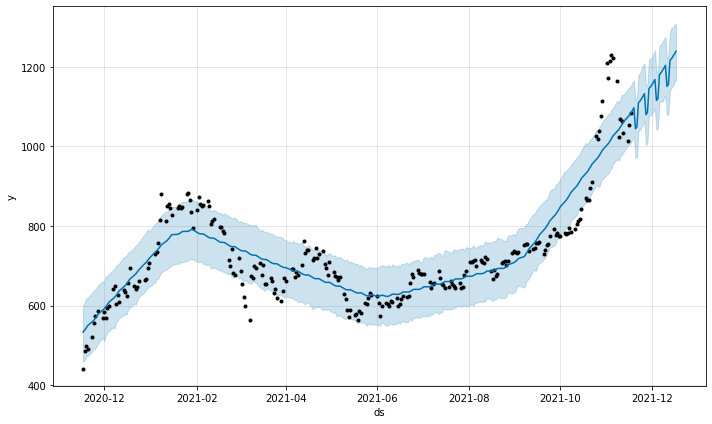

In [22]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

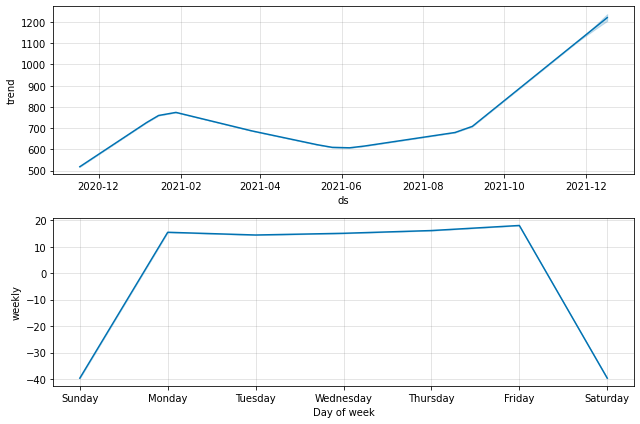

In [23]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [24]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>